In [10]:
# Librerias ...
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import scatter_matrix

%matplotlib inline

In [18]:
# Lectura de datos archivo CSV
df = pd.read_csv('C:\\v_git\\Data-Science\\1_DataAdquisition\\salida.csv', header=0, index_col=0)

**Nota**: El path del archivo es ABSOLUTO y debería de apuntar a donde se encuentra el archivo generado el el paso 1.DataAdquisition

In [19]:
# Analisis Exploratorio de los datos 

## Breve resumen de como es el DATASET
df.head()

,Caso X,D,L,Beta,Velocidad,Angulo,A,B,Q,Reynolds,TotalAreaInlet,P
0,Caso 1,0.040,0.9,0.2,0.204118,0,2.450149e+08,-3.823780e+12,0.000064,-1223.657629,0.000314,19.252066
1,Caso 10,0.055,0.9,0.2,0.204064,0,-6.651764e+08,1.039277e+13,0.000064,-1223.336620,0.000314,19.334154
2,Caso 10,0.055,0.9,0.2,0.203576,120,-8.176469e+07,1.251365e+12,0.000064,-1220.408023,0.000314,119.507168
3,Caso 10,0.055,0.9,0.2,0.205064,-120,-5.392983e+08,8.382981e+12,0.000064,-1228.085671,0.000313,125.712072
4,Caso 10,0.055,0.9,0.2,0.205143,145,-8.137361e+07,1.248173e+12,0.000064,-1228.559816,0.000313,92.636307



El DataSet tiene la información sobre las geometrias de los aneurismas en la orta:

    * Caso X = Es una variable categórica, que en realidad es una variable calculada de (D,L,Beta)
    * D = Diámetro Máximo del Aneurismas en metros.
    * L = Longitud del aneurisma en metros.
    * Beta = Asimetría.
    * TotalAreaInt = El área de entrada a la vena.
    * Angulo = El ángulo de incidencia de la orta respecto a la vena.
    
Y algunas características físicas del fluido (sangre):
    * Velocidad = La velocidad de la sangre en metros/segundos
    * Q = Caudal = La cantidad de fluido (sangre) que circula a través de una sección (aorta)
    * Reynolds = Valor que ayuda a determinar el régimen de un fluido.
    
Target
    * P = Diferencia de presión.

In [6]:
## Análisis de cada una de las variables numericas...
df.describe()

,D,L,Beta,Velocidad,Angulo,A,B,Q,Reynolds,TotalAreaInlet,P
count,514.000000,514.000000,514.000000,514.000000,514.000000,5.140000e+02,5.140000e+02,514.000000,514.000000,514.000000,514.000000
mean,0.058103,1.101556,0.584436,0.263678,-15.194553,-8.911428e+07,1.053215e+12,0.000086,-1594.178675,0.000326,105.755347
std,0.016230,0.164718,0.324309,0.058781,135.706803,3.103322e+08,3.978504e+12,0.000065,424.109043,0.000203,83.704187
min,0.040000,0.900000,0.200000,0.203355,-170.000000,-2.021873e+09,-1.378738e+13,0.000064,-5443.640753,0.000313,19.252066
25%,0.040000,0.900000,0.200000,0.205087,-145.000000,-1.696461e+08,-7.377931e+11,0.000064,-2041.037407,0.000313,40.768568
50%,0.055000,1.100000,0.600000,0.273094,0.000000,-4.175433e+07,5.284970e+11,0.000085,-1635.710269,0.000313,78.765143
75%,0.080000,1.300000,1.000000,0.340323,145.000000,5.747243e+07,2.024327e+12,0.000107,-1228.224574,0.000313,135.454205
max,0.080000,1.300000,1.000000,0.355114,170.000000,1.049235e+09,3.158021e+13,0.001101,-1219.082652,0.003803,392.763449


- D >= 0.04 y D <= 0.08
- L >= 0.9 y L <= 1.30
- Beta >=0.2 y  Beta <=1 
- Velocidad >= 0.136594 y Velocidad <= 0.354242
- Angulo >= -170, Angulo <= 170
- A >= -2.021873e+09 y A <= 1.049235e+09, lo que sorprende es la enorme desviaciòn estandard.
- B >= -1.378738e+13 y B <= 3.158021e+13, lo que sorprende es la enorme desviaciòn estandard.
- Reynolds >= -5443.640753 y B <= -1219.082652
- Q >= 0.000064 y Q <= 0.001101
- TotalAreaInt >= 0.000313 y TotalAreaInt <= 0.003803
- P >= 19.235 y P <= 392


In [7]:
# Numero de filas y número de atributos
df.shape

(514, 12)

 El DATASET contiene 514 filas y 12 atributos.

In [15]:
# ¿El DATASET contiene alguna columa con valores nulo?
df_bool = pd.isnull(df).sum()
df_bool

Caso X       0
D            0
L            0
Beta         0
Velocidad    0
Angulo       0
A            0
B            0
dtype: int64

Determinamos que todos los valores del DATASET estan informados

In [9]:
# Existen filas repetidas ...
print(df.shape)
df = df.groupby(['Caso X', 'D','L','Beta','Velocidad','Angulo','A','B','Q', 'Reynolds','TotalAreaInlet', 'P']).size().reset_index()
print(df.shape)


(514, 12)
(450, 13)


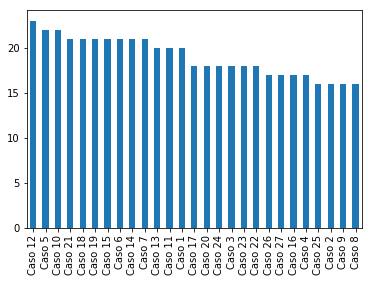

In [29]:
## Análisis Visual de los datos 

# Variable cuantitativa Caso X
pd_value_counts_caso_x = pd.value_counts(df['Caso X'].values, sort=True)
pd_value_counts_caso_x.plot.bar()

Existen 27 posibles tipos de geometrias categorizadas. Visualmente ya se ve que no tenemos de todos los casos el mismo número de simulaciones realizadas.

Text(0.5,1,u'Histogram of D')

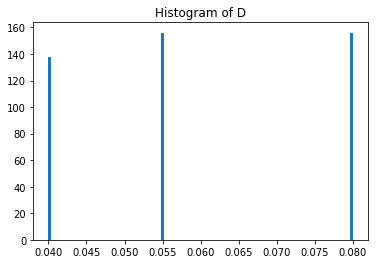

In [110]:
# Análisis Visual de los datos 
plt.hist(df['D'], bins=100)
plt.title('Histogram of D')

In [ ]:
 # Concluimos que la variable D, toma estos 3 valores
 # D [0.04, 0.055, 0.08]

Text(0.5,1,u'Histogram of L')

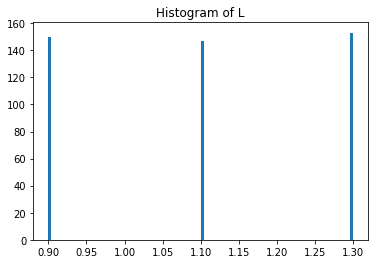

In [111]:
plt.hist(df['L'], bins=100)
plt.title('Histogram of L')

In [8]:
 # Concluimos que la variable L, toma estos 3 valores
 # D [90, 110, 130]

Text(0.5,1,u'Histogram of Beta')

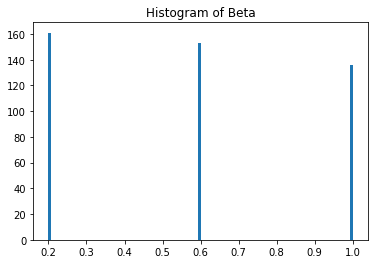

In [112]:
plt.hist(df['Beta'], bins=100)
plt.title('Histogram of Beta')

In [10]:
 # Concluimos que la variable Beta, toma estos 3 valores
 # Beta [0.2, 0.6, 1.0]

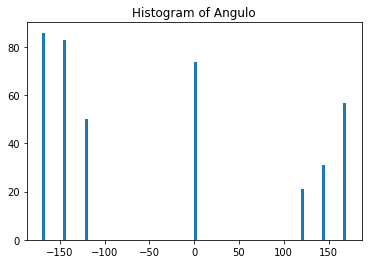

In [7]:
plt.hist(df['Angulo'], bins=100)
plt.title('Histogram of Angulo')

In [ ]:
# Otra variable que toma unos valores concretos
# Angulo [-170, -145, -120, 0 ,120, 145, 170]

Text(0.5,1,u'Histogram of Velocidad')

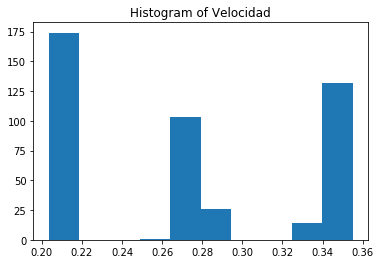

In [114]:
plt.hist(df['Velocidad'], bins=10)
plt.title('Histogram of Velocidad')

In [12]:
# Concluimos que la variable Velocidad, tambien podriamos decir que esta en 3 grupos.

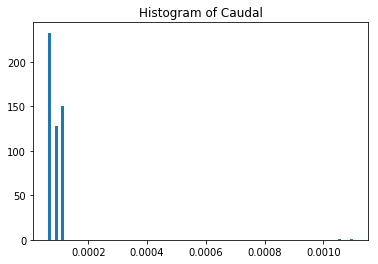

In [24]:
plt.hist(df['Q'], bins=100)
plt.title('Histogram of Caudal')

Aqui se ve más claramente que tenemos 3 caudales, y como la velocidad y el caudal estan relacionado podemos concluir que lo que habiamos dicho de que hay 3 velocidades anteriormente es "cierto".

En realidad con el caudal se ve más claro que hay 3 velocidades porque el caudal es mas estable.


In [ ]:
# Para determinar si hay dependencias entre variables se suele hacer la matriz de correlación.

# Sin embargo hay que recordar que si hay correlacion entonces implica que existe una dependecia 
# lineal entre variables pero que si no hay correlacion no significa que no haya una dependencia lineal
# entre ellas.

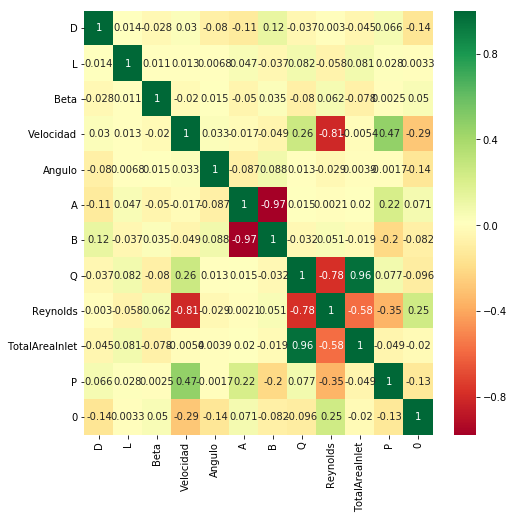

In [153]:
# Método 1: Matriz de correlacion [-1, 1] , es una matriz SIMETRICA
    # Valores cercanos a  1 : Indica una correlacion POSTIVA entre variables, cuando un valor crece el otro tambien.
    # Valores cercanos a -1 : Indica una correlacion NEGATIVA entre variables, cuando un valore decrece el otro crece. 
    
    # Nota: Si valor 0 indica que NO hay correlacion (es decir no existe una dependecia lineal entre variables)
    # OJO! eso no significa que la varibles sean INDEPENDIENTES, sino que no hay relacion lineal entre ellas, al reves
    # si que significa, es decir si hay correlacion entonces hay dependencia lineal y eso implica dependecia de variables.
    
    # [0.00, 0.09] correlación nula
    # [0.10, 0.19] correlación muy débil
    # [0.20, 0.49] correlación débil
    # [0.50, 0.69] correlación moderada
    # [0.70, 0.84] correlación significativa
    # [0.96, 1.00] correlación perfecta
    
matriz_correlacion = df.corr()

 # Realizamos mapa de calor
cell_size = df.shape[1] * 1.2 if df.shape[1] < 12 else df.shape[1] * 0.6
plt.subplots(figsize=(cell_size,cell_size))

sns.heatmap(matriz_correlacion, cmap='RdYlGn', annot = True)
plt.show();      

Las manchas MAS rojas y MAS VERDES son las que estan mas CORRELACIONADAS

¿Para que nos sirve saber la correlacion de las variables?
Pues las variables correlacionadas ... no deberian estar incluidas en el modelo, ... 

Cuando hay variables con dependencias (especialmente linealmente dependientes, como es el caso aquí) esto puede provocar overfitting en el modelo. En este caso, tenemos que eliminar una de las dos para evitar que haya esa colinearlidad entre variables. Eliminamos una porque "ya tenemos toda la información que podemos sacar de ambas variables con una sola de ellas, porque la primera ya explica la segunda".

En el caso que nos ocupa vemos que las variable A y B estan fuertemente correlacionadas y que la TotalAreaInt y el Caudal estan tambien correlacionadas al igual que el coeficiente de Reynolds y el Caudal.

Sabemos que TotalAreaInt = Q / Velocidad 
Sabemos que Coeficiente de Reynolds  = densidad fluido x velocidad x diametro / viscosidad del fluido

Sabemos que P = AQ + BQQ pero esto no es una dependencia lineal y por eso aqui no se ve reflejada 

En realidad la Velocidad y el caudal estan relacionados como vimos antes Q = TotalAreaInt * V

Al igual que Reynolds y el cuadal = densidad fluido x caudal x diametro / (viscosidad del fluido * area)

Nota: En la extracción de los atributos de los archivos JSON estas variables ya se sabia que estaban relacionadas pero fueron determinantes para comprobar que las simulaciones eran correctas. Hubieran muchos problemas al ejecutar las simulaciones y ver que a veces no acaban bien o bien sus datos eran anómalos, es por eso que estos datos se sacaron para comprobar la integridad.


C:\Users\svalero\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001461CEB8>,
      dtype=object)

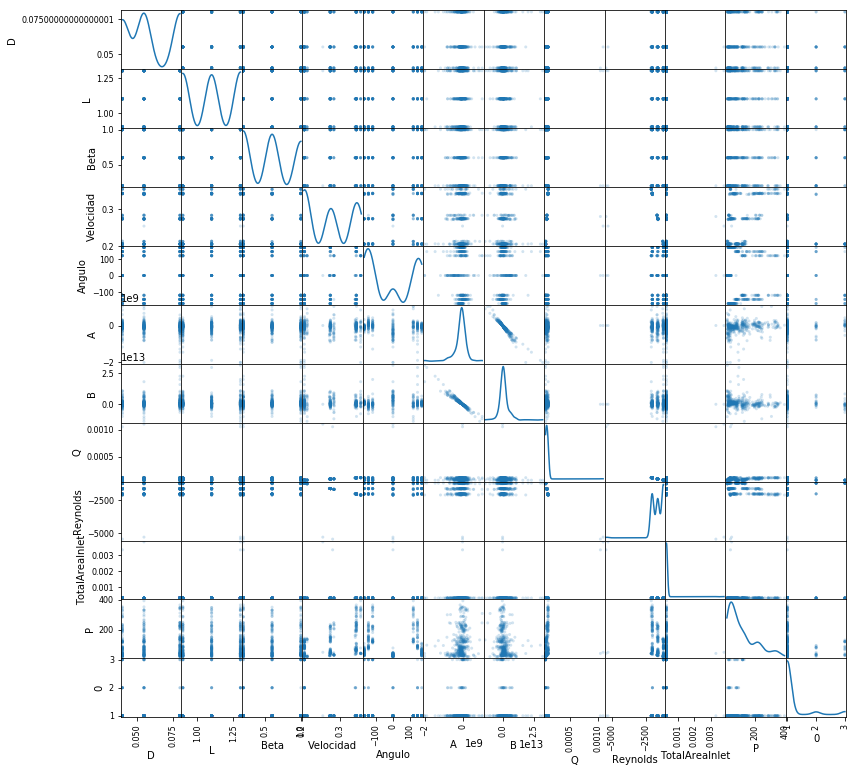

In [154]:
# Metodo 2: Matriz de dispersión ...
# Plot de todas las variables contra todas las variables
scatter_matrix(df, alpha=0.2, figsize=(df.shape[1], df.shape[1]), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001EA3E9B0>]],
      dtype=object)

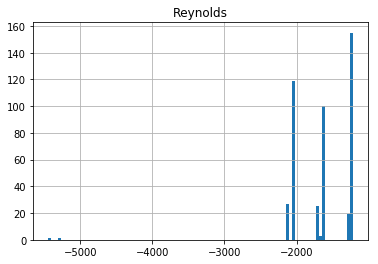

In [168]:
# Chequeamos si hay OUTLIERS en los DATOS ...
df.hist(column='Reynolds', bins=100)

De esta gráfica ya se puede determinar "cosas" extrañas la primera que el coeficiente de Reynolds, siempre deberia ser positivo y sin embargo ya se ve que no es asi.
Por otro lado existe unos valores que estan muy alejados de la normalidad valores inferiores a -5000. 

In [25]:
# ¿Cuales son esos elementos "raros"?
df[df['Reynolds']<-5000]

,Caso X,D,L,Beta,Velocidad,Angulo,A,B,Q,Reynolds,TotalAreaInlet,P
489,Caso 3,0.040,1.3,0.2,0.279522,0,-46212.922854,2.087584e+06,0.001052,-5443.640753,0.003310,42.296159
503,Caso 12,0.055,1.3,0.2,0.253638,0,15754.884261,-6.612231e+07,0.001101,-5294.547208,0.003803,49.922333


Text(0.5,1,u'Histogram of Q')

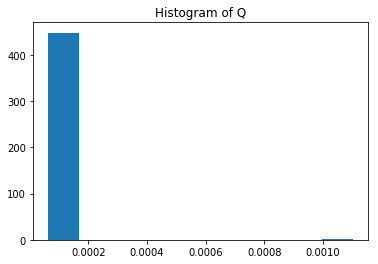

In [170]:
# Chequeamos si hay OUTLIERS en los DATOS ...
plt.hist(df['Q'], bins=10)
plt.title('Histogram of Q')

In [27]:
# Aqui si nos fijamos bien también hay unos valores muy extremos al final ...

# ¿Cuales son esos elementos "raros"?
df[df['Q']>0.0010]


,Caso X,D,L,Beta,Velocidad,Angulo,A,B,Q,Reynolds,TotalAreaInlet,P
489,Caso 3,0.040,1.3,0.2,0.279522,0,-46212.922854,2.087584e+06,0.001052,-5443.640753,0.003310,42.296159
503,Caso 12,0.055,1.3,0.2,0.253638,0,15754.884261,-6.612231e+07,0.001101,-5294.547208,0.003803,49.922333


In [ ]:
# Por tanto, que concluimos que son las mismas filas que ya veiamos que en Reynolds ya daba "raro"

Text(0.5,1,u'Histogram of P')

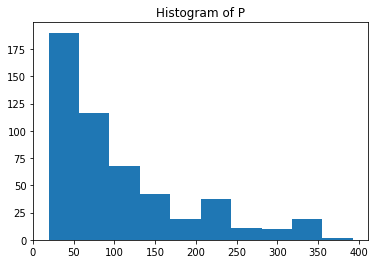

In [18]:
# Y finalmente vemos el análisis de la variable a predecir
plt.hist(df['P'])
plt.title('Histogram of P')

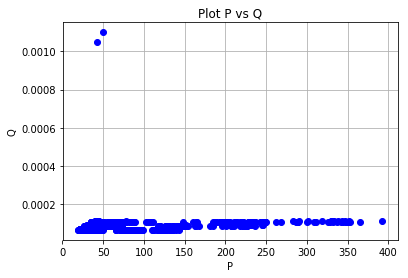

In [22]:
plt.plot(df['P'], df['Q'],'bo')
plt.xlabel('P')
plt.ylabel('Q')
plt.title('Plot P vs Q')
plt.grid(True)
plt.show()

En el gráfico se pueden apreciar que existen 2 valores un poco anómalos ...

Vamos a determinar cuales son:    

In [28]:
df[df['Q']>0.0010]

,Caso X,D,L,Beta,Velocidad,Angulo,A,B,Q,Reynolds,TotalAreaInlet,P
489,Caso 3,0.040,1.3,0.2,0.279522,0,-46212.922854,2.087584e+06,0.001052,-5443.640753,0.003310,42.296159
503,Caso 12,0.055,1.3,0.2,0.253638,0,15754.884261,-6.612231e+07,0.001101,-5294.547208,0.003803,49.922333


In [ ]:
# Aqui vemos el mismo fenómemo ... podemos concluir que son simulaciones que no han terminado bien.
# en el cleaning / check data se borraran.